In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
pops = pd.read_csv("data/state_pops.csv")

In [6]:

pops.sort_index(inplace=True)

In [7]:
pops.sort_index().loc[:,1990:1991,:]

IndexingError: Too many indexers

In [8]:
pops.loc[:,[2013],:]

IndexingError: Too many indexers

In [9]:
pops[pops["population"]%2==0]

state  year   population
0       AL  2012    4817528.0
1       AL  2010    4785570.0
3       AL  2009    4757938.0
4       AL  2013    4833722.0
5       AL  2007    4672840.0
...    ...   ...          ...
1256   USA  1998  275854116.0
1262   USA  2004  292805298.0
1264   USA  2006  298379912.0
1266   USA  2008  304093966.0
1270   USA  2011  311582564.0

[645 rows x 3 columns]

In [10]:
titanic = pd.read_csv("data/titanic.csv", low_memory=False)
titanic["age"]=titanic["age"].replace(["?"],[None]).astype("float")
titanic["fare"]=titanic["fare"].replace(["?"],[None]).astype("float")

In [11]:
titanic.groupby('sex').agg({"age":["min","max","mean"], 
                            "fare":["min","max"],"survived":"mean"})

age                   fare            survived
           min   max       mean   min       max      mean
sex                                                      
female  0.1667  76.0  28.687071  6.75  512.3292  0.727468
male    0.3333  80.0  30.585233  0.00  512.3292  0.190985

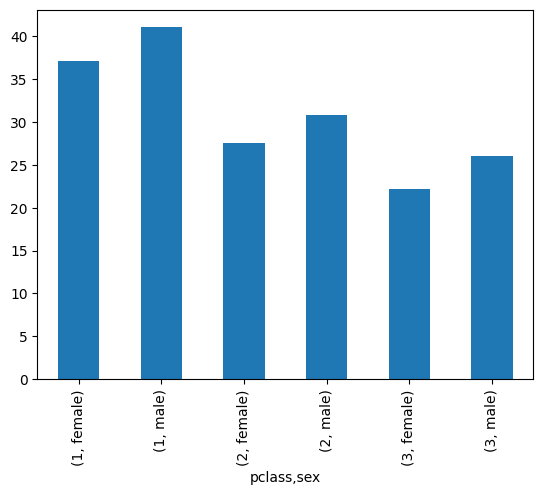

In [12]:
df = titanic.groupby(["pclass","sex"])["age"].mean().plot(kind="bar")


In [13]:
df = titanic.groupby(["pclass","sex"])["age"].mean().unstack()

<AxesSubplot: xlabel='pclass'>

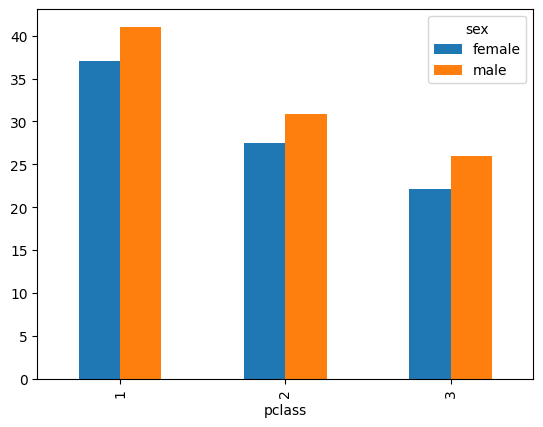

In [14]:
df.plot(kind="bar")

<AxesSubplot: xlabel='sex'>

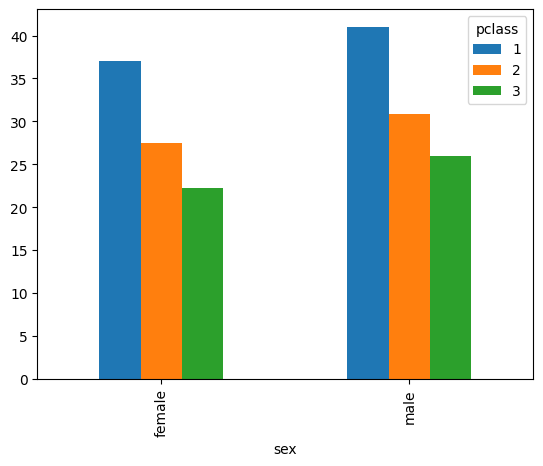

In [15]:
titanic.groupby(["pclass","sex"])["age"].mean().unstack("pclass").plot(kind="bar")

In [16]:
titanic.groupby(["sex","survived"])["age"].mean()

sex     survived
female  0           25.255208
        1           29.815354
male    0           31.516412
        1           26.977778
Name: age, dtype: float64

In [21]:
titanic.groupby(["sex","survived"])["age"].mean().unstack()

survived          0          1
sex                           
female    25.255208  29.815354
male      31.516412  26.977778

<AxesSubplot: xlabel='sex'>

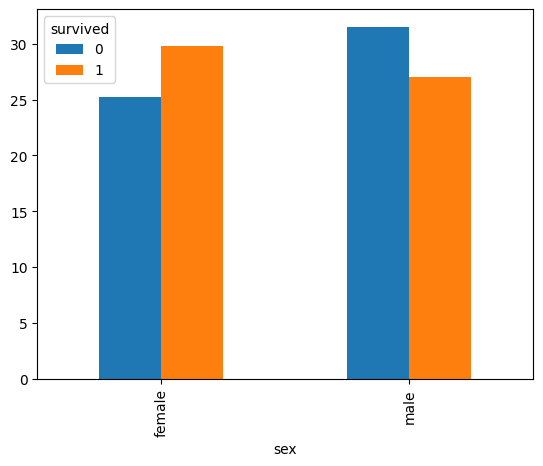

In [22]:
titanic.groupby(["sex","survived"])["age"].mean().unstack().plot(kind="bar")

In [23]:
df = titanic.groupby(["sex","survived"])["age"].mean()

<AxesSubplot: xlabel='sex'>

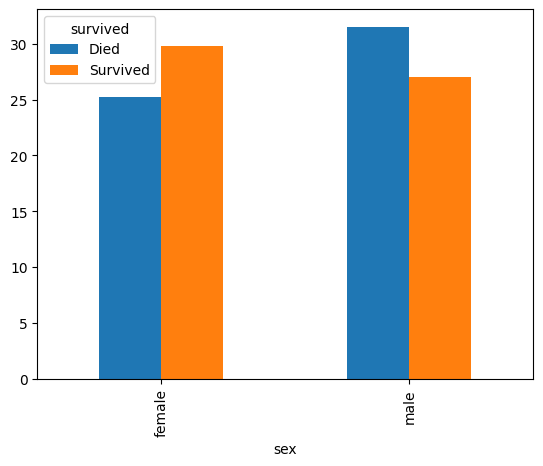

In [25]:
df.unstack().rename(columns={0:"Died", 1:"Survived"}).plot(kind="bar")